### 3. Persamaan Aliran Panas
Dalam rumusan dasar fisika yang lazim dikenal sewaktu sekolah mengengah, aliran panas pada bahan konduktor dirumuskan menurut
\begin{eqnarray}
  \dot{Q}=\frac{dQ}{dt}=kA\frac{dT}{dx}\tag{3.1}
\end{eqnarray}

Secara umum, persamaan aliran panas dalam koordinat kartesian 3D dapat dituliskan menurut
\begin{eqnarray}
\frac{\partial u}{\partial t}=\alpha \nabla ^2 u \tag{3.2}
\end{eqnarray}
Untuk lebih detail memahami hubungan antara (3.1) dan (3.1) dapat dilihat di https://en.wikipedia.org/wiki/Heat_equation

#### Contoh
Sebuah batang logam panjang $L$ salah satu ujungnya memiliki suhu $100^0 C$ dan ujung lainnya memiliki suhu $0^0 C$, bagimanakah aliran panas di sepanjang logam tersebut?

Untuk menjawab permasalahan ini tentu persamaan (3.1) ditulis kembali menurut
\begin{eqnarray}
  \frac{\partial u}{\partial t}=\alpha \frac{\partial^2u}{\partial^2 x}
\end{eqnarray}
atau dapat juga dituliskan menurut
\begin{eqnarray}
  u_t=\alpha u_{xx}. \tag{3.3}
\end{eqnarray}

##### forward difference
\begin{eqnarray}
  f_{n+1}=f_n+hf'_n+...
\end{eqnarray}
dengan $f'_n=df_n/dx$, sehingga
\begin{eqnarray}
  f'_n=\frac{f_{n+1}-f_n}{h}
\end{eqnarray}
##### central difference
\begin{eqnarray}
f^"_n=\frac{f_{n+1}+f_{n-1}-2f_n}{h^2}.
\end{eqnarray}

Berikutnya persamaan (3.3) dapat diuraikan menurut
\begin{eqnarray}
\frac{u_{i,j+1}-u_{i,j}}{h_t}=\alpha\left(\frac{u_{i+1,j}+u_{i-1,j}-2u_{i,j}}{h_x^2}\right)
\end{eqnarray}
sehingga
\begin{eqnarray}
u_{i,j+1}=c\left(u_{i+1,j}+u_{i-1,j}\right)+(1-2c)u_{i,j}
\end{eqnarray}
dengan $c=\alpha h_t/h_x^2$
<center><img src="gridheat.png" align="center"  width="300" /></center>


##### syarat batas
\begin{eqnarray}
   u(0,t)=100,\qquad\qquad u(L,t)=0
\end{eqnarray}

In [1]:
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D

L = 1
tmax  = 2
x, hx  = linspace(0,L,100, retstep=True)
t, ht = linspace(0,tmax,10000, retstep=True)

alp = 0.1
c = alp*ht/hx**2

In [2]:
u = zeros((len(x),len(t)))
u[0,:]=100

for j in range (len(t)-1):
    for i in range (1,len(x)-1):
        u[i,j+1]=c*(u[i+1,j]+u[i-1,j])+(1-2*c)*u[i,j]



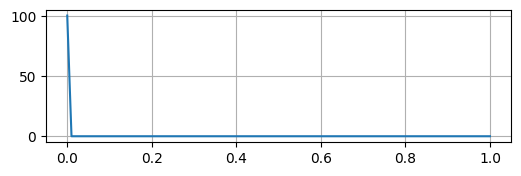

In [3]:
fig = figure(figsize=(6,10))
ax = subplot(5,1,1)
ax.plot(x,u[:,0])
grid('on')

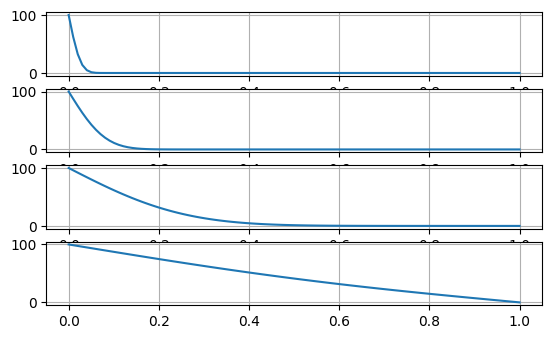

In [8]:
ax = subplot(5,1,2)
ax.plot(x,u[:,10])
grid('on')
ax = subplot(5,1,3)
ax.plot(x,u[:,100])
grid('on')
ax = subplot(5,1,4)
ax.plot(x,u[:,1000])
grid('on')
ax = subplot(5,1,5)
ax.plot(x,u[:,10000-1])
grid('on')


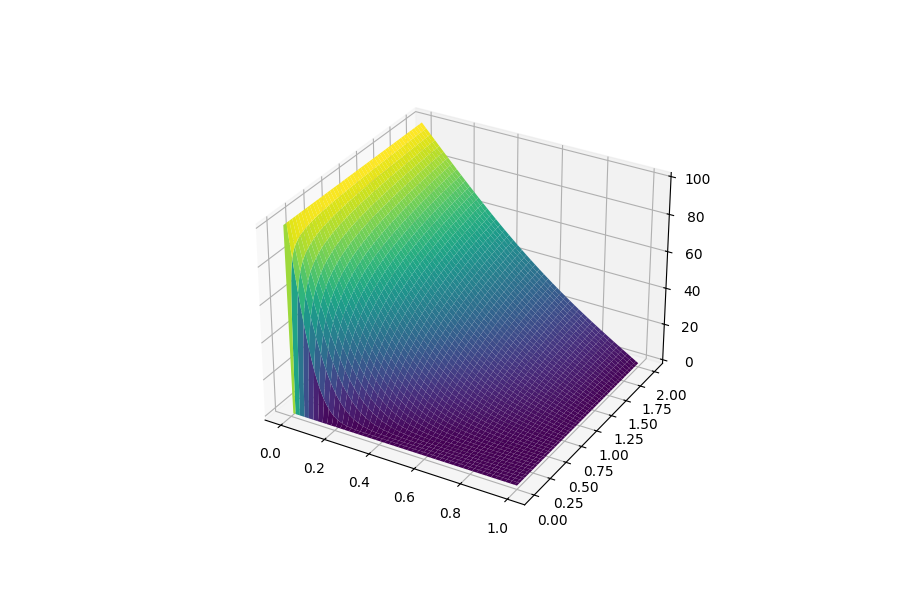

In [9]:
%matplotlib widget
X,T =meshgrid(x,t)
fig = figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, u.T, cmap='viridis');

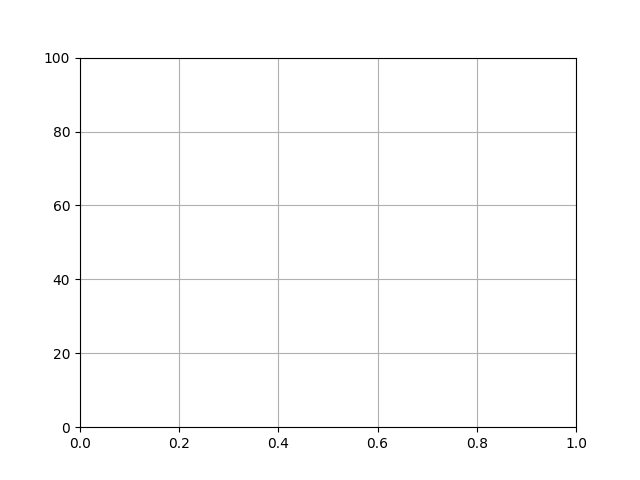

In [10]:
from matplotlib.animation import FuncAnimation
x1=x
y1=u
fig, ax = subplots(1,1)
ax.set_xlim(0,1)
ax.set_ylim(0,100)
ax.grid()
line, = ax.plot([],[], linestyle="-",  color='blue', lw=2)

def anim(i):
    animx=[x1]
    animy=[y1[:,i]]
    line.set_data(animx,animy)

ani = FuncAnimation(fig, anim, arange(1, len(t)), interval=0.001 )
show()


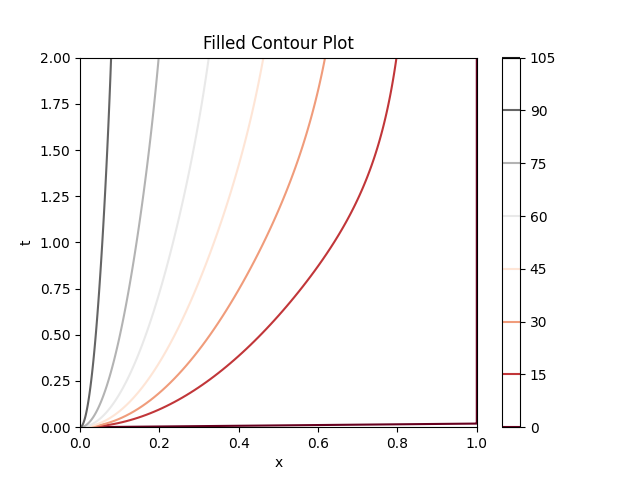

In [11]:
fig, ax = subplots(1, 1) 
  
# plots filled contour plot 
cp = ax.contour(X, T, u.T, cmap='RdGy') 
  
ax.set_title('Filled Contour Plot') 
ax.set_xlabel('x') 
ax.set_ylabel('t')
fig.colorbar(cp)

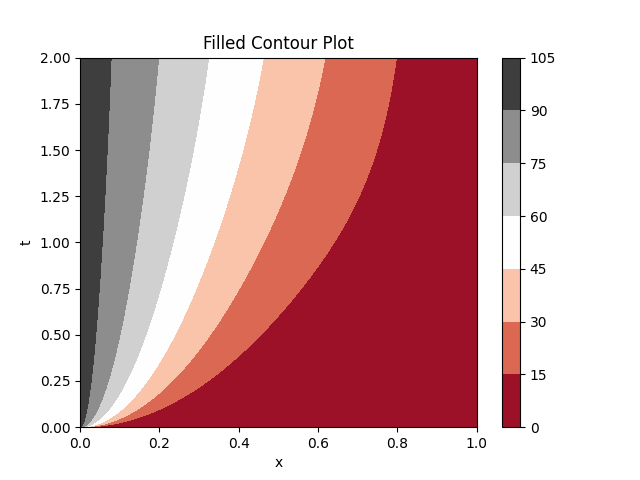

In [12]:
fig, ax = subplots(1, 1) 
  
# plots filled contour plot 
cp = ax.contourf(X, T, u.T, cmap='RdGy') 
  
ax.set_title('Filled Contour Plot') 
ax.set_xlabel('x') 
ax.set_ylabel('t')
fig.colorbar(cp)